In [1]:
import pandas as pd
import numpy as np
import matplotlib as plot

%matplotlib inline

In [2]:
cd ..

/Users/mingmingguo


In [3]:
cd Documents

/Users/mingmingguo/Documents


In [4]:
data = pd.read_csv('market_train.csv')
data.head()

/Users/mingmingguo/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (8,9,10,11,12,43,157,196,214,225,228,229,231,235,238) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
0,2,H,224,0,4300,C,0,0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
1,4,H,7,53,4448,B,1,0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
2,5,H,116,3,3464,C,0,0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
3,7,H,240,300,3200,C,0,0,False,False,...,98,98,998,999999998,998,998,9998,9998,RCC,0
4,8,R,72,261,2000,N,0,0,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,1


In [6]:
numerics = ['float64', 'int64']
data_num = data.select_dtypes(include=numerics)
data_num.head()

,ID,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,VAR_0016,...,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,target
0,2,224,0,4300,0,0,0,0,0,1,...,0,98,98,998,999999998,998,998,9998,9998,0
1,4,7,53,4448,1,0,1,0,1,2,...,0,98,98,998,999999998,998,998,9998,9998,0
2,5,116,3,3464,0,0,0,0,0,1,...,0,98,98,998,999999998,998,998,9998,9998,0
3,7,240,300,3200,0,0,0,0,0,2,...,0,98,98,998,999999998,998,998,9998,9998,0
4,8,72,261,2000,0,0,0,0,0,1,...,0,98,98,998,999999998,998,998,9998,9998,1


In [8]:
non_numerics = ['object']
data_object = data.select_dtypes(include=non_numerics)
data_object.head()

,VAR_0001,VAR_0005,VAR_0008,VAR_0009,VAR_0010,VAR_0011,VAR_0012,VAR_0043,VAR_0044,VAR_0073,...,VAR_0325,VAR_0342,VAR_0352,VAR_0353,VAR_0354,VAR_0404,VAR_0466,VAR_0467,VAR_0493,VAR_1934
0,H,C,False,False,False,False,False,False,[],NaN,...,-1,CF,O,U,O,CHIEF EXECUTIVE OFFICER,-1,-1,COMMUNITY ASSOCIATION MANAGER,IAPS
1,H,B,False,False,False,False,False,False,[],04SEP12:00:00:00,...,H,EC,O,R,R,-1,I,Discharged,-1,IAPS
2,H,C,False,False,False,False,False,False,[],NaN,...,R,UU,R,R,-1,-1,-1,-1,-1,IAPS
3,H,C,False,False,False,False,False,False,[],NaN,...,H,-1,R,R,-1,-1,-1,-1,-1,RCC
4,R,N,False,False,False,False,False,False,[],NaN,...,S,-1,R,U,O,-1,-1,-1,-1,BRANCH


In [9]:
# create dummy variable for VAR0005
var0005_dummies = pd.get_dummies(data_object.VAR_0005, prefix='VAR0005')

# drop the first column
var0005_dummies.drop(var0005_dummies.columns[0], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
data_o = pd.concat([data_object, var0005_dummies], axis=1)
data_o.sample(n=5, random_state=1)

,VAR_0001,VAR_0005,VAR_0008,VAR_0009,VAR_0010,VAR_0011,VAR_0012,VAR_0043,VAR_0044,VAR_0073,...,VAR_0353,VAR_0354,VAR_0404,VAR_0466,VAR_0467,VAR_0493,VAR_1934,VAR0005_C,VAR0005_N,VAR0005_S
110454,H,B,False,False,False,False,False,False,[],NaN,...,O,U,-1,-1,-1,-1,CSC,0,0,0
130626,H,B,False,False,False,False,False,False,[],NaN,...,U,U,-1,-1,-1,-1,IAPS,0,0,0
1573,R,C,False,False,False,False,False,False,[],17SEP11:00:00:00,...,U,-1,-1,I,Discharged,-1,IAPS,1,0,0
83213,R,B,False,False,False,False,False,False,[],09AUG12:00:00:00,...,U,O,-1,I,Discharged,-1,IAPS,0,0,0
62934,H,C,False,False,False,False,False,False,[],NaN,...,R,R,-1,-1,-1,-1,BRANCH,1,0,0


In [10]:
# create dummy variable for VAR0001
var0001_dummies = pd.get_dummies(data_o.VAR_0001, prefix='VAR0001')

# drop the first column
var0001_dummies.drop(var0001_dummies.columns[0], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
data_ob = pd.concat([data_o, var0005_dummies], axis=1)
data_ob.sample(n=5, random_state=1)

,VAR_0001,VAR_0005,VAR_0008,VAR_0009,VAR_0010,VAR_0011,VAR_0012,VAR_0043,VAR_0044,VAR_0073,...,VAR_0466,VAR_0467,VAR_0493,VAR_1934,VAR0005_C,VAR0005_N,VAR0005_S,VAR0005_C,VAR0005_N,VAR0005_S
110454,H,B,False,False,False,False,False,False,[],NaN,...,-1,-1,-1,CSC,0,0,0,0,0,0
130626,H,B,False,False,False,False,False,False,[],NaN,...,-1,-1,-1,IAPS,0,0,0,0,0,0
1573,R,C,False,False,False,False,False,False,[],17SEP11:00:00:00,...,I,Discharged,-1,IAPS,1,0,0,1,0,0
83213,R,B,False,False,False,False,False,False,[],09AUG12:00:00:00,...,I,Discharged,-1,IAPS,0,0,0,0,0,0
62934,H,C,False,False,False,False,False,False,[],NaN,...,-1,-1,-1,BRANCH,1,0,0,1,0,0


In [11]:
# create dummy variable for VAR0232
var0232_dummies = pd.get_dummies(data_ob.VAR_0232, prefix='VAR0232')

# drop the first column
var0232_dummies.drop(var0232_dummies.columns[0], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
data_obj = pd.concat([data_ob, var0232_dummies], axis=1)
data_obj.sample(n=5, random_state=1)

,VAR_0001,VAR_0005,VAR_0008,VAR_0009,VAR_0010,VAR_0011,VAR_0012,VAR_0043,VAR_0044,VAR_0073,...,VAR_0467,VAR_0493,VAR_1934,VAR0005_C,VAR0005_N,VAR0005_S,VAR0005_C,VAR0005_N,VAR0005_S,VAR0232_True
110454,H,B,False,False,False,False,False,False,[],NaN,...,-1,-1,CSC,0,0,0,0,0,0,1
130626,H,B,False,False,False,False,False,False,[],NaN,...,-1,-1,IAPS,0,0,0,0,0,0,1
1573,R,C,False,False,False,False,False,False,[],17SEP11:00:00:00,...,Discharged,-1,IAPS,1,0,0,1,0,0,0
83213,R,B,False,False,False,False,False,False,[],09AUG12:00:00:00,...,Discharged,-1,IAPS,0,0,0,0,0,0,0
62934,H,C,False,False,False,False,False,False,[],NaN,...,-1,-1,BRANCH,1,0,0,1,0,0,1


In [12]:
# create dummy variable for VAR0237
var0237_dummies = pd.get_dummies(data_obj.VAR_0237, prefix='VAR0237')

# drop the first column
var0237_dummies.drop(var0237_dummies.columns[0], axis=1, inplace=True)

# print 5 random rows
var0237_dummies.sample(n=5, random_state=1) 

,VAR0237_AL,VAR0237_AR,VAR0237_AZ,VAR0237_CA,VAR0237_CO,VAR0237_CT,VAR0237_DC,VAR0237_DE,VAR0237_FL,VAR0237_GA,...,VAR0237_SC,VAR0237_SD,VAR0237_TN,VAR0237_TX,VAR0237_UT,VAR0237_VA,VAR0237_WA,VAR0237_WI,VAR0237_WV,VAR0237_WY
110454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130626,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
62934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# create dummy variable for VAR0283
var0283_dummies = pd.get_dummies(data_obj.VAR_0283, prefix='VAR0283')

# drop the first column
var0283_dummies.drop(var0283_dummies.columns[0], axis=1, inplace=True)

# print 5 random rows
var0283_dummies.sample(n=5, random_state=1) 

,VAR0283_F,VAR0283_H,VAR0283_P,VAR0283_R,VAR0283_S,VAR0283_U
110454,0,0,0,0,1,0
130626,0,0,0,0,1,0
1573,0,0,0,0,1,0
83213,0,0,0,0,1,0
62934,0,0,0,0,1,0


In [15]:
# create dummy variable for VAR00342
var0342_dummies = pd.get_dummies(data_obj.VAR_0342, prefix='VAR0342')

# drop the first column
var0342_dummies.drop(var0342_dummies.columns[0], axis=1, inplace=True)

# print 5 random rows
var0342_dummies.sample(n=5, random_state=1) 

,VAR0342_AA,VAR0342_AB,VAR0342_AC,VAR0342_AD,VAR0342_AE,VAR0342_AF,VAR0342_AU,VAR0342_BA,VAR0342_BB,VAR0342_BC,...,VAR0342_FE,VAR0342_FF,VAR0342_FU,VAR0342_UA,VAR0342_UB,VAR0342_UC,VAR0342_UD,VAR0342_UE,VAR0342_UF,VAR0342_UU
110454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83213,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
62934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# create dummy variable for VAR0352
var0352_dummies = pd.get_dummies(data_obj.VAR_0352, prefix='VAR0352')

# drop the first column
var0352_dummies.drop(var0352_dummies.columns[0], axis=1, inplace=True)

# print 5 random rows
var0352_dummies.sample(n=5, random_state=1) 

,VAR0352_O,VAR0352_R,VAR0352_U
110454,0,0,1
130626,1,0,0
1573,0,1,0
83213,0,0,1
62934,1,0,0


In [17]:
# create dummy variable for VAR0466
var0466_dummies = pd.get_dummies(data_obj.VAR_0466, prefix='VAR0466')

# drop the first column
var0466_dummies.drop(var0466_dummies.columns[0], axis=1, inplace=True)

# print 5 random rows
var0466_dummies.sample(n=5, random_state=1) 

,VAR0466_I
110454,0
130626,0
1573,1
83213,1
62934,0


In [18]:
# create dummy variable for VAR0467
var0467_dummies = pd.get_dummies(data_obj.VAR_0467, prefix='VAR0467')

# drop the first column
var0467_dummies.drop(var0467_dummies.columns[0], axis=1, inplace=True)

# print 5 random rows
var0467_dummies.sample(n=5, random_state=1) 

,VAR0467_Discharge NA,VAR0467_Discharged,VAR0467_Dismissed
110454,0,0,0
130626,0,0,0
1573,0,1,0
83213,0,1,0
62934,0,0,0


In [19]:
# create dummy variable for VAR1934
var1934_dummies = pd.get_dummies(data_obj.VAR_1934, prefix='VAR1934')

# drop the first column
var1934_dummies.drop(var1934_dummies.columns[0], axis=1, inplace=True)

# print 5 random rows
var1934_dummies.sample(n=5, random_state=1) 

,VAR1934_CSC,VAR1934_IAPS,VAR1934_MOBILE,VAR1934_RCC
110454,1,0,0,0
130626,0,1,0,0
1573,0,1,0,0
83213,0,1,0,0
62934,0,0,0,0


In [20]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
data_1 = pd.concat([var0232_dummies, var0237_dummies], axis=1)
data_1.sample(n=5, random_state=1)

,VAR0232_True,VAR0237_AL,VAR0237_AR,VAR0237_AZ,VAR0237_CA,VAR0237_CO,VAR0237_CT,VAR0237_DC,VAR0237_DE,VAR0237_FL,...,VAR0237_SC,VAR0237_SD,VAR0237_TN,VAR0237_TX,VAR0237_UT,VAR0237_VA,VAR0237_WA,VAR0237_WI,VAR0237_WV,VAR0237_WY
110454,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130626,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
62934,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data_2 = pd.concat([data_1, var0283_dummies], axis=1)
data_2.sample(n=5, random_state=1)

,VAR0232_True,VAR0237_AL,VAR0237_AR,VAR0237_AZ,VAR0237_CA,VAR0237_CO,VAR0237_CT,VAR0237_DC,VAR0237_DE,VAR0237_FL,...,VAR0237_WA,VAR0237_WI,VAR0237_WV,VAR0237_WY,VAR0283_F,VAR0283_H,VAR0283_P,VAR0283_R,VAR0283_S,VAR0283_U
110454,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
130626,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
83213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
62934,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
data_3 = pd.concat([data_2, var0342_dummies], axis=1)
data_3.sample(n=5, random_state=1)

,VAR0232_True,VAR0237_AL,VAR0237_AR,VAR0237_AZ,VAR0237_CA,VAR0237_CO,VAR0237_CT,VAR0237_DC,VAR0237_DE,VAR0237_FL,...,VAR0342_FE,VAR0342_FF,VAR0342_FU,VAR0342_UA,VAR0342_UB,VAR0342_UC,VAR0342_UD,VAR0342_UE,VAR0342_UF,VAR0342_UU
110454,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130626,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83213,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
62934,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data_4 = pd.concat([data_3, var0352_dummies], axis=1)
data_4.sample(n=5, random_state=1)

,VAR0232_True,VAR0237_AL,VAR0237_AR,VAR0237_AZ,VAR0237_CA,VAR0237_CO,VAR0237_CT,VAR0237_DC,VAR0237_DE,VAR0237_FL,...,VAR0342_UA,VAR0342_UB,VAR0342_UC,VAR0342_UD,VAR0342_UE,VAR0342_UF,VAR0342_UU,VAR0352_O,VAR0352_R,VAR0352_U
110454,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
130626,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
83213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
62934,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
data_5 = pd.concat([data_4, var0466_dummies], axis=1)
data_5.sample(n=5, random_state=1)

,VAR0232_True,VAR0237_AL,VAR0237_AR,VAR0237_AZ,VAR0237_CA,VAR0237_CO,VAR0237_CT,VAR0237_DC,VAR0237_DE,VAR0237_FL,...,VAR0342_UB,VAR0342_UC,VAR0342_UD,VAR0342_UE,VAR0342_UF,VAR0342_UU,VAR0352_O,VAR0352_R,VAR0352_U,VAR0466_I
110454,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
130626,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
83213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
62934,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
data_6 = pd.concat([data_5, var0467_dummies], axis=1)
data_6.sample(n=5, random_state=1)

,VAR0232_True,VAR0237_AL,VAR0237_AR,VAR0237_AZ,VAR0237_CA,VAR0237_CO,VAR0237_CT,VAR0237_DC,VAR0237_DE,VAR0237_FL,...,VAR0342_UE,VAR0342_UF,VAR0342_UU,VAR0352_O,VAR0352_R,VAR0352_U,VAR0466_I,VAR0467_Discharge NA,VAR0467_Discharged,VAR0467_Dismissed
110454,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
130626,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
83213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
62934,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [27]:
data_7 = pd.concat([data_6, var1934_dummies], axis=1)
data_7.sample(n=5, random_state=1)

,VAR0232_True,VAR0237_AL,VAR0237_AR,VAR0237_AZ,VAR0237_CA,VAR0237_CO,VAR0237_CT,VAR0237_DC,VAR0237_DE,VAR0237_FL,...,VAR0352_R,VAR0352_U,VAR0466_I,VAR0467_Discharge NA,VAR0467_Discharged,VAR0467_Dismissed,VAR1934_CSC,VAR1934_IAPS,VAR1934_MOBILE,VAR1934_RCC
110454,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
130626,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1573,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
83213,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,0
62934,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data_8 = pd.concat([data_7, var0001_dummies], axis=1)
data_8.sample(n=5, random_state=1)

,VAR0232_True,VAR0237_AL,VAR0237_AR,VAR0237_AZ,VAR0237_CA,VAR0237_CO,VAR0237_CT,VAR0237_DC,VAR0237_DE,VAR0237_FL,...,VAR0466_I,VAR0467_Discharge NA,VAR0467_Discharged,VAR0467_Dismissed,VAR1934_CSC,VAR1934_IAPS,VAR1934_MOBILE,VAR1934_RCC,VAR0001_Q,VAR0001_R
110454,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
130626,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1573,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
83213,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
62934,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
data_9 = pd.concat([data_8, var0005_dummies], axis=1)
data_9.sample(n=5, random_state=1)

,VAR0232_True,VAR0237_AL,VAR0237_AR,VAR0237_AZ,VAR0237_CA,VAR0237_CO,VAR0237_CT,VAR0237_DC,VAR0237_DE,VAR0237_FL,...,VAR0467_Dismissed,VAR1934_CSC,VAR1934_IAPS,VAR1934_MOBILE,VAR1934_RCC,VAR0001_Q,VAR0001_R,VAR0005_C,VAR0005_N,VAR0005_S
110454,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
130626,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1573,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
83213,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
62934,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
data_num.pop('ID')
target = data_num.pop('target')
data_num.head()

,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,VAR_0016,VAR_0017,...,VAR_1924,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933
0,224,0,4300,0,0,0,0,0,1,0,...,9998,0,98,98,998,999999998,998,998,9998,9998
1,7,53,4448,1,0,1,0,1,2,1,...,9998,0,98,98,998,999999998,998,998,9998,9998
2,116,3,3464,0,0,0,0,0,1,0,...,9998,0,98,98,998,999999998,998,998,9998,9998
3,240,300,3200,0,0,0,0,0,2,0,...,9998,0,98,98,998,999999998,998,998,9998,9998
4,72,261,2000,0,0,0,0,0,1,0,...,9998,0,98,98,998,999999998,998,998,9998,9998


In [31]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
data_ = pd.concat([data_num, data_9], axis=1)
data_.sample(n=5, random_state=1)

,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,VAR_0016,VAR_0017,...,VAR0467_Dismissed,VAR1934_CSC,VAR1934_IAPS,VAR1934_MOBILE,VAR1934_RCC,VAR0001_Q,VAR0001_R,VAR0005_C,VAR0005_N,VAR0005_S
110454,168,180,1625,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
130626,65,48,4600,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1573,1,166,2450,1,1,1,1,1,2,0,...,0,0,1,0,0,0,1,1,0,0
83213,72,30,3850,5,1,5,1,2,2,3,...,0,0,1,0,0,0,1,0,0,0
62934,41,140,2017,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
data_ = data_.fillna(data_num.mean())
data_ = data_.fillna(0)
data_.head()

,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,VAR_0016,VAR_0017,...,VAR0467_Dismissed,VAR1934_CSC,VAR1934_IAPS,VAR1934_MOBILE,VAR1934_RCC,VAR0001_Q,VAR0001_R,VAR0005_C,VAR0005_N,VAR0005_S
0,224,0,4300,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,7,53,4448,1,0,1,0,1,2,1,...,0,0,1,0,0,0,0,0,0,0
2,116,3,3464,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,240,300,3200,0,0,0,0,0,2,0,...,0,0,0,0,1,0,0,1,0,0
4,72,261,2000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [37]:
data_array = data_.as_matrix()
data_array

array([[  2.24000000e+02,   0.00000000e+00,   4.30000000e+03, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.00000000e+00,   5.30000000e+01,   4.44800000e+03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.16000000e+02,   3.00000000e+00,   3.46400000e+03, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.03000000e+02,   3.10000000e+01,   2.60400000e+03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.80000000e+01,   1.20000000e+01,   4.32500000e+03, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.28000000e+02,   1.20000000e+02,   1.85000000e+04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [38]:
# do the feature scaling and normalization for the data set
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(data_array)
print features

[[ 0.22422422  0.          0.00195455 ...,  1.          0.          0.        ]
 [ 0.00700701  0.05305305  0.00202182 ...,  0.          0.          0.        ]
 [ 0.11611612  0.003003    0.00157455 ...,  1.          0.          0.        ]
 ..., 
 [ 0.1031031   0.03103103  0.00118364 ...,  0.          0.          0.        ]
 [ 0.07807808  0.01201201  0.00196591 ...,  1.          0.          0.        ]
 [ 0.22822823  0.12012012  0.00840909 ...,  0.          0.          0.        ]]


In [40]:
# Tree-based feature selection
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier()
clf.fit(features, target)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
features_new = clf.transform(features)
features_new.shape

(145231, 992)

In [61]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_new, target, test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
print 'Accuracy of the Logistic Regression Model:', accuracy_score(y_test, pred)

from sklearn.metrics import f1_score
print 'f1 score:', f1_score(y_test, pred)

Accuracy of the Logistic Regression Model: 0.78536
f1 score: 0.35674898106


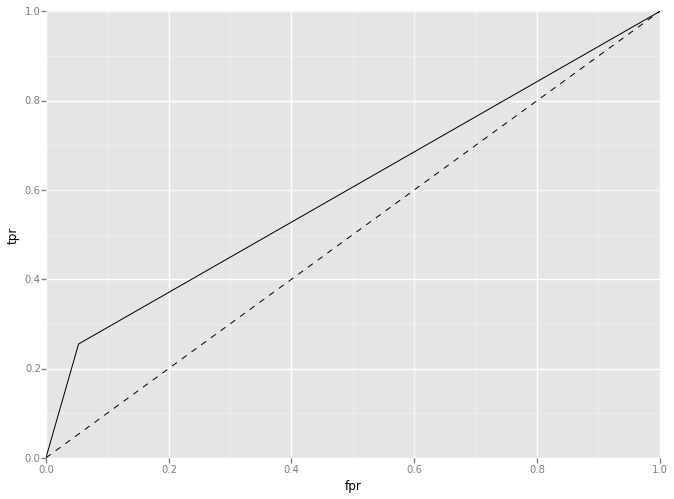

<ggplot: (340829797)>

In [58]:
from ggplot import *
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, pred)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

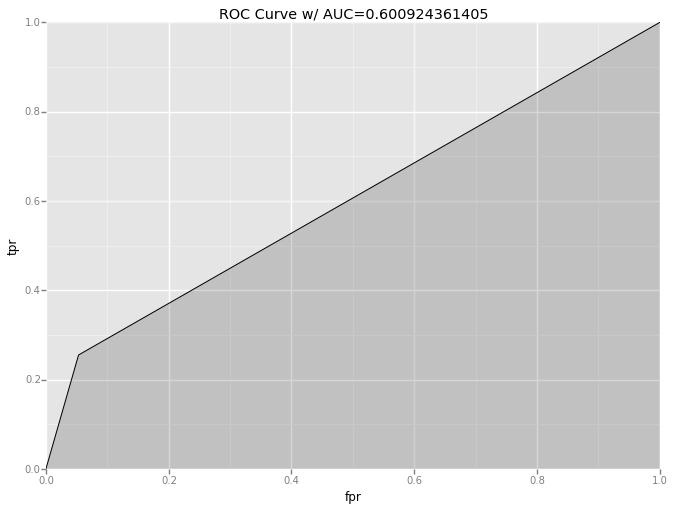

<ggplot: (301256645)>

In [59]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr', ymin=0, ymax='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))